In [3]:
%run -i "./Utils.ipynb"
%run -i "./Modelos.ipynb"

Using TensorFlow backend.


In [4]:
file = 'UScommentTest.csv'
top_words = 43 # 10000
embedding_size = 32
max_len = 100 # 1000

<h2>Generate Data</h2>

In [5]:
X_data, y_data = gen_dataset(file, delim=',', top_words=top_words, pad_len=max_len, balancing = False)

43
43
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [7]:
classes = y_data.shape[1]

<h2>Train-Test Split</h2>

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [11]:
from imblearn.over_sampling import SMOTE

In [112]:
y_train_compact = y_train.copy()
y_train_compact = pd.DataFrame(y_train_compact)
y_train_compact = y_train_compact[1]
balancer = SMOTE()
x_resampled, y_resampled = balancer.fit_sample(X_train, y_train_compact)
y_resampled = to_categorical(y_resampled)

<h2>MLP - Training</h2>

In [122]:
def model_training(model, train, test, validation, epochs, callbacks, file):
    model_history = []
    X_train, y_train = train
    X_test, y_test = test
    X_val, y_val = validation
    
    model_history.append(model.fit(X_train, y_train, epochs=10, validation_data=[X_val, y_val], callbacks=callbacks))
    result = model.evaluate(X_test, y_test)

    print('Accuracy (test set): {}'.format(result[1]))

    plt.plot(model_history[-1].history['acc'])
    plt.plot(model_history[-1].history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    model.save_weights(file + ".hdf5")
    return model

Train on 1722 samples, validate on 115 samples
Epoch 1/10
1722/1722 [==============================] - 4s 2ms/step - loss: 0.6951 - acc: 0.5215 - val_loss: 0.6715 - val_acc: 0.8174
Epoch 2/10
1722/1722 [==============================] - 2s 954us/step - loss: 0.6591 - acc: 0.6510 - val_loss: 0.6407 - val_acc: 0.6348
Epoch 3/10
1722/1722 [==============================] - 2s 943us/step - loss: 0.4605 - acc: 0.8287 - val_loss: 0.4077 - val_acc: 0.7739
Epoch 4/10
1722/1722 [==============================] - 2s 938us/step - loss: 0.3490 - acc: 0.8554 - val_loss: 0.3803 - val_acc: 0.7739
Epoch 5/10
1722/1722 [==============================] - 2s 981us/step - loss: 0.3260 - acc: 0.8537 - val_loss: 0.4522 - val_acc: 0.7565
Epoch 6/10
1722/1722 [==============================] - 2s 906us/step - loss: 0.3036 - acc: 0.8641 - val_loss: 0.3392 - val_acc: 0.7913
Epoch 7/10
1722/1722 [==============================] - 1s 857us/step - loss: 0.2973 - acc: 0.8676 - val_loss: 0.3805 - val_acc: 0.7826
Epo

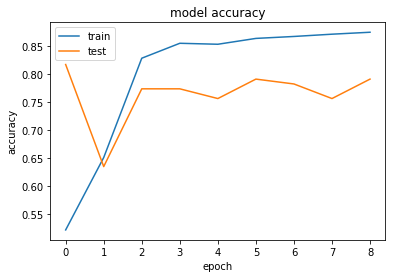

In [125]:
m = model_training(mlp_model(250, classes, top_words + 1, embedding_size, max_len), [x_resampled, y_resampled], [X_test, y_test], [X_val, y_val], 10, [early_stop], 'foo')

In [132]:
y_pred = m.predict(X_test)

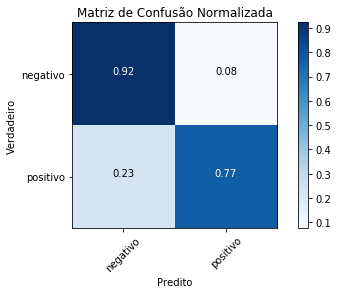

In [133]:
class_names = ['negativo', 'positivo']

cnf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matriz de Confusão Normalizada')

plt.show()

In [135]:
word_to_id = np.load('word_to_id.npy').tolist()
new_sample = transform_review('the worst movie ever made', word_to_id, 100)

C:\Anaconda3\lib\re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


In [136]:
pred = model.predict(new_sample)[0]
i = np.argmax(pred)
sentiment = class_names[i]
conf = np.round(pred[i] * 100, 2)


print("O review 'the worst movie ever made' foi considerado " + sentiment + " com {}% de confiança".format(conf))

O review 'the worst movie ever made' foi considerado negativo com 98.88% de confiança


In [108]:
from keras.callbacks import *

In [109]:
early_stop = EarlyStopping(monitor='val_loss',
                           min_delta=1e-6, 
                           patience=3, 
                           verbose=0, 
                           mode='auto', 
                           baseline=None)

In [110]:
model = mlp_model(250, classes, top_words + 1, embedding_size, max_len)

Train on 1722 samples, validate on 115 samples
Epoch 1/10
1722/1722 [==============================] - 4s 2ms/step - loss: 0.6884 - acc: 0.5302 - val_loss: 0.6148 - val_acc: 0.8522
Epoch 2/10
1722/1722 [==============================] - 2s 1ms/step - loss: 0.5294 - acc: 0.7898 - val_loss: 0.4090 - val_acc: 0.7565
Epoch 3/10
1722/1722 [==============================] - 2s 1ms/step - loss: 0.3552 - acc: 0.8531 - val_loss: 0.3854 - val_acc: 0.7652
Epoch 4/10
1722/1722 [==============================] - 2s 1ms/step - loss: 0.3061 - acc: 0.8606 - val_loss: 0.3901 - val_acc: 0.7652
Epoch 5/10
1722/1722 [==============================] - 2s 1ms/step - loss: 0.2947 - acc: 0.8612 - val_loss: 0.3984 - val_acc: 0.7652
Epoch 6/10
493/493 [==============================] - 0s 166us/step
Accuracy (test set): 0.8012170386604557


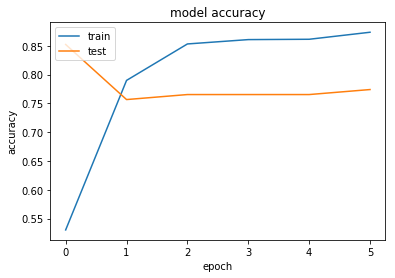

In [111]:
mlp_model_history = []

mlp_model_history.append(model.fit(x_resampled, y_resampled, epochs=10, validation_data=[X_val, y_val], callbacks=[early_stop]))
result = model.evaluate(X_test, y_test)

print('Accuracy (test set): {}'.format(result[1]))
plt.plot(mlp_model_history[-1].history['acc'])
plt.plot(mlp_model_history[-1].history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
model.save_weights("mlp_250_neurons.hdf5")

In [19]:
y_pred = model.predict(X_test)

<h2>Plotando Matriz de Confusão</h2>

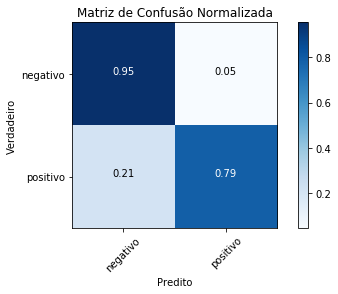

In [20]:
class_names = ['negativo', 'positivo']

cnf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matriz de Confusão Normalizada')

plt.show()

<h2>Nova predição</h2>

In [21]:
word_to_id = np.load('word_to_id.npy').tolist()

new_sample = transform_review('the worst movie ever made', word_to_id, 100)

C:\Anaconda3\lib\re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


In [22]:
pred = model.predict(new_sample)[0]
i = np.argmax(pred)
sentiment = class_names[i]
conf = np.round(pred[i] * 100, 2)


print("O review 'the worst movie ever made' foi considerado " + sentiment + " com {}% de confiança".format(conf))

O review 'the worst movie ever made' foi considerado negativo com 98.8% de confiança


<h2>CNN 1D - Treinamento</h2>

In [63]:
%run -i "./Modelos.ipynb"

In [48]:
from keras.callbacks import *

In [49]:
early_stop = EarlyStopping(monitor='val_loss',
                           min_delta=1e-6, 
                           patience=3, 
                           verbose=0, 
                           mode='auto', 
                           baseline=None)

In [50]:
model = cnn_model(32, 3, 250, 2, top_words + 1, embedding_size, max_len)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 100, 32)           1408      
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 100, 32)           3104      
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 50, 32)            0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 250)               400250    
_________________________________________________________________
dense_32 (Dense)             (None, 2)                 502       
Total params: 405,264
Trainable params: 405,264
Non-trainable params: 0
_________________________________________________________________


Train on 1034 samples, validate on 115 samples
Epoch 1/5
1034/1034 [==============================] - 6s 6ms/step - loss: 0.4865 - acc: 0.8104 - val_loss: 0.4702 - val_acc: 0.8174
Epoch 2/5
1034/1034 [==============================] - 1s 719us/step - loss: 0.4269 - acc: 0.8327 - val_loss: 0.3994 - val_acc: 0.8174
Epoch 3/5
1034/1034 [==============================] - 1s 614us/step - loss: 0.3005 - acc: 0.8327 - val_loss: 0.2755 - val_acc: 0.8174
Epoch 4/5
1034/1034 [==============================] - 1s 612us/step - loss: 0.2323 - acc: 0.8443 - val_loss: 0.2604 - val_acc: 0.8348
Epoch 5/5
493/493 [==============================] - 0s 147us/step
Accuracy (test set): 0.8275862070174537


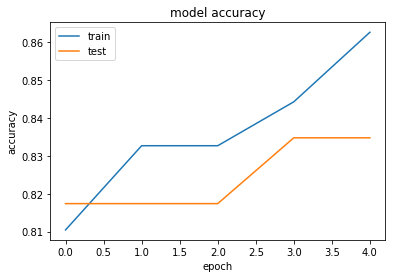

In [51]:
model.fit(X_train, y_train, epochs=5, validation_data=[X_val, y_val], callbacks=[early_stop])
result = model.evaluate(X_test, y_test)

print('Accuracy (test set): {}'.format(result[1]))
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
model.save_weights("cnn_32filters_250_neurons.hdf5")

In [58]:
y_pred = model.predict(X_test)

<h2>Plotando Matriz de Confusão</h2>

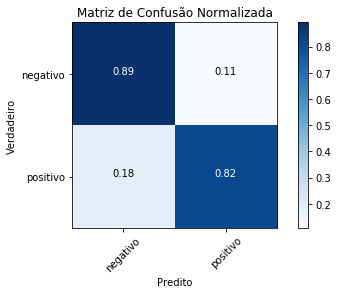

In [59]:
class_names = ['negativo', 'positivo']

cnf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matriz de Confusão Normalizada')

plt.show()

<h2>Nova predição</h2>

In [60]:
word_to_id = np.load('word_to_id.npy').tolist()

new_sample = transform_review('the worst movie ever made', word_to_id, 100)

C:\Anaconda3\lib\re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


In [61]:
pred = model.predict(new_sample)[0]
i = np.argmax(pred)
sentiment = class_names[i]
conf = np.round(pred[i] * 100, 2)


print("O review 'the worst movie ever made' foi considerado " + sentiment + " com {}% de confiança".format(conf))

O review 'the worst movie ever made' foi considerado negativo com 50.53% de confiança


<h2>LSTM - Treinamento</h2>

In [90]:
%run -i "./Modelos.ipynb"

In [91]:
from keras.callbacks import *

In [92]:
early_stop = EarlyStopping(monitor='val_loss',
                           min_delta=1e-6, 
                           patience=3, 
                           verbose=0, 
                           mode='auto', 
                           baseline=None)

In [96]:
model = lstm_model(100, classes, top_words + 1, embedding_size, max_len)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_30 (Embedding)     (None, 100, 32)           1408      
_________________________________________________________________
dropout_27 (Dropout)         (None, 100, 32)           0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 100)               53200     
_________________________________________________________________
dropout_28 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 2)                 202       
Total params: 54,810
Trainable params: 54,810
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.fit(X_train, y_train, epochs=10, validation_data=[X_val, y_val], callbacks=[early_stop])
result = model.evaluate(X_test, y_test)
print('Accuracy (test set): {}'.format(result[1]))

Train on 1034 samples, validate on 115 samples
Epoch 1/10
1034/1034 [==============================] - 9s 8ms/step - loss: 0.5012 - acc: 0.8327 - val_loss: 0.4758 - val_acc: 0.8174
Epoch 2/10
1034/1034 [==============================] - 3s 3ms/step - loss: 0.4527 - acc: 0.8327 - val_loss: 0.4753 - val_acc: 0.8174
Epoch 3/10
1034/1034 [==============================] - 2s 2ms/step - loss: 0.4601 - acc: 0.8327 - val_loss: 0.4770 - val_acc: 0.8174
Epoch 4/10
1034/1034 [==============================] - 2s 2ms/step - loss: 0.4589 - acc: 0.8327 - val_loss: 0.4756 - val_acc: 0.8174
Epoch 5/10
493/493 [==============================] - 0s 489us/step
Accuracy (test set): 0.868154158335912


In [99]:
model.save_weights("lstm_100_units.hdf5")

In [106]:
y_pred = model.predict(X_test)

<h2>Plotando Matriz de Confusão</h2>

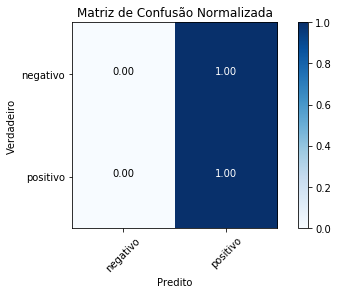

In [102]:
class_names = ['negativo', 'positivo']

cnf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matriz de Confusão Normalizada')

plt.show()

<h2>Nova predição</h2>

In [104]:
word_to_id = np.load('word_to_id.npy').tolist()

new_sample = transform_review('the worst movie ever made', word_to_id, 100)

C:\Anaconda3\lib\re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


In [105]:
pred = model.predict(new_sample)[0]
i = np.argmax(pred)
sentiment = class_names[i]
conf = np.round(pred[i] * 100, 2)


print("O review 'the worst movie ever made' foi considerado " + sentiment + " com {}% de confiança".format(conf))

O review 'the worst movie ever made' foi considerado positivo com 85.44% de confiança
